In [1]:

%matplotlib inline

d:\PROGRAMMING\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\PROGRAMMING\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\PROGRAMMING\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Frequentist Estimation
theta = 0.8
n = 20

for M in [10,100,1000,10000,10000,100000,1000000]:
    sample_theta=np.random.binomial(n,theta,size=M)/n 
    #This line generates a sample of M values from a Binomial distribution with parameters n and theta
    sample_bias_theta = np.mean(sample_theta)-theta
    #Calculates the sample bias by finding the mean of the generated samples and subtracting the true value theta
    sample_var_theta = np.sum((sample_theta-np.mean(sample_theta))**2)/(M-1)
    true_var_theta= theta *(1-theta)/n
    print("{:8} {: 12.2e} {:16.4f} {:14.4f}".format(M, sample_bias_theta, sample_var_theta, true_var_theta))

      10     2.00e-02           0.0084         0.0080
     100     9.50e-03           0.0103         0.0080
    1000    -3.75e-03           0.0076         0.0080
   10000    -1.31e-03           0.0080         0.0080
   10000    -7.90e-04           0.0080         0.0080
  100000     6.60e-05           0.0080         0.0080
 1000000     4.51e-05           0.0080         0.0080


posterior mean: 0.7
posterior s.d.: 0.13816985594155148


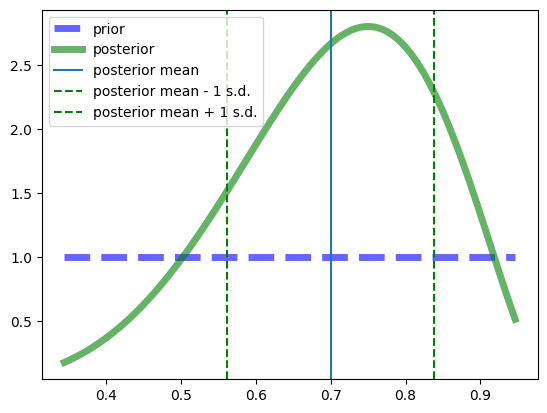

In [5]:
#Bayesian Estimation(uniformative prior)
alpha, beta = 7, 3

posterior_mean, posterior_var, posterior_skew, posterior_kurt = scipy.stats.beta.stats(alpha, beta, moments='mvsk')

xs = np.linspace(scipy.stats.beta.ppf(0.01, alpha, beta), scipy.stats.beta.ppf(0.99, alpha, beta), 100)
plt.plot(xs, [1 for x in xs], 'b--', lw=5, alpha=.6, label='prior')
plt.plot(xs, scipy.stats.beta.pdf(xs, alpha, beta), 'g-', lw=5, alpha=.6, label='posterior')
plt.axvline(posterior_mean, label='posterior mean')
posterior_sd = np.sqrt(posterior_var)
plt.axvline(posterior_mean - posterior_sd, linestyle='--', color='g', label='posterior mean - 1 s.d.')
plt.axvline(posterior_mean + posterior_sd, linestyle='--', color='g', label='posterior mean + 1 s.d.')
plt.legend(loc='upper left');

print('posterior mean:', posterior_mean)
print('posterior s.d.:', posterior_sd)

posterior mean: 0.6428571428571429
posterior s.d.: 0.12371791482634838


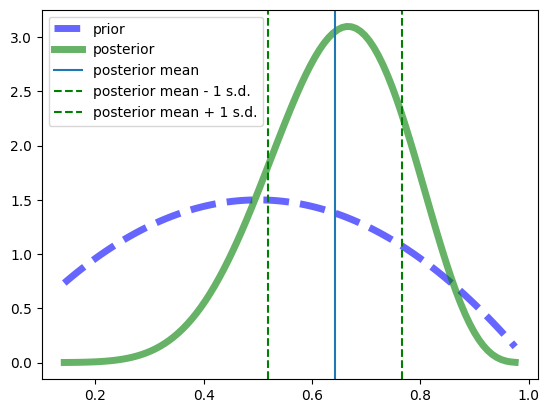

In [6]:
prior_alpha, prior_beta = 2., 2.
posterior_alpha, posterior_beta = prior_alpha + 7, prior_beta + 10 - 7

posterior_mean, posterior_var, posterior_skew, posterior_kurt = scipy.stats.beta.stats(posterior_alpha, posterior_beta, moments='mvsk')

xs = np.linspace(scipy.stats.beta.ppf(0.00001, posterior_alpha, posterior_beta), 
                 scipy.stats.beta.ppf(0.99999, posterior_alpha, posterior_beta), 100)
plt.plot(xs, scipy.stats.beta.pdf(xs, prior_alpha, prior_beta), 'b--', lw=5, alpha=.6, label='prior')
plt.plot(xs, scipy.stats.beta.pdf(xs, posterior_alpha, posterior_beta), 'g-', lw=5, alpha=.6, label='posterior')
plt.axvline(posterior_mean, label='posterior mean')
posterior_sd = np.sqrt(posterior_var)
plt.axvline(posterior_mean - posterior_sd, linestyle='--', color='g', label='posterior mean - 1 s.d.')
plt.axvline(posterior_mean + posterior_sd, linestyle='--', color='g', label='posterior mean + 1 s.d.')
plt.legend(loc='upper left');
print('posterior mean:', posterior_mean)
print('posterior s.d.:', posterior_sd)